In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


In [2]:
from cuml.manifold import TSNE
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2021/train.csv')

In [4]:
target = train['target'].values
train = train[train.columns[1:-1]].values

In [5]:
RS = RobustScaler()
train = RS.fit_transform(train)

In [6]:
%%time
tsne = TSNE(n_components=2)
train_2D = tsne.fit_transform(train)

[W] [16:40:36.216499] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
CPU times: user 25.2 s, sys: 14.4 s, total: 39.6 s
Wall time: 42 s


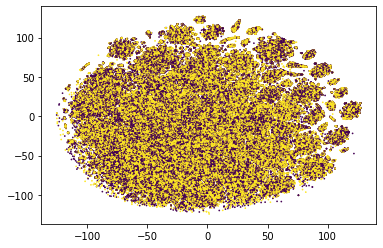

In [7]:
plt.scatter(train_2D[:,0], train_2D[:,1], c = target, s = 0.5)